# Simulator
## Issues:
- Remove/solve incomplete vehicle pings?
- remove inactive or not?

## Now developing:
- Holding Strategies
- Evaluation Metrics

## Things to consider:
- Time gap between streaming and simulation
- Dwell time calculation formula

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import buskit as bk
from buskit import busdata as bdata
from buskit import dashboard as bdash
from buskit import simulator as bsim

from IPython.display import display, clear_output

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# specify path to the archive AVL file
archive_path = 'MTA_data/B15-180625-235941-44650-Mon.csv'

# parse stops and set links
stops, links, stop_pos = bsim.set_route(archive_path, 1)

# create empty dictionary storage for bus objects
live_bus = {} # for buses from archive streaming
active_bus = {} # for buses in the simulator

# Original trajectory

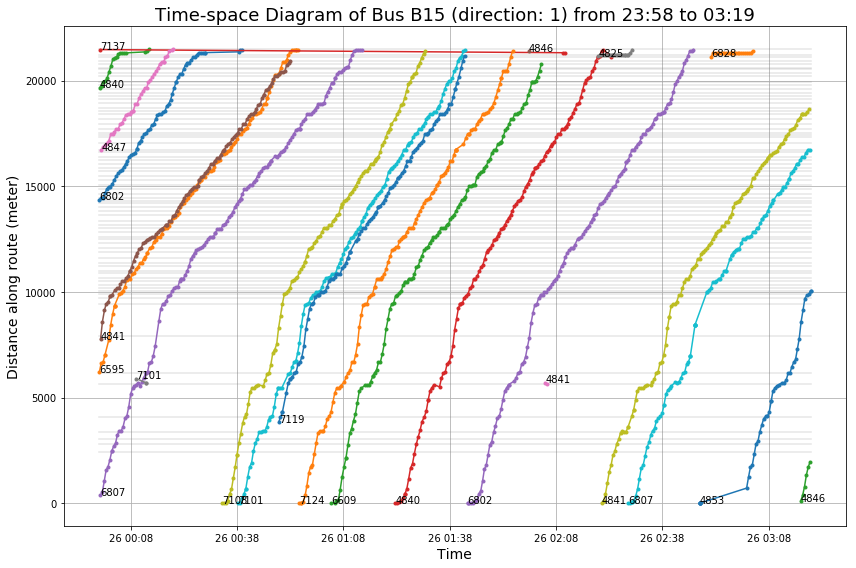

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11768c898>)

In [3]:
# plot TSD for cross-validation
df = pd.read_csv(archive_path)
df = bdata.split_trips(df)
bdata.plot_tsd(df, 1, 0, 201)

# Simulation without control

In [3]:
bsim.simulate(archive_path, 1, live_bus, active_bus, stops, links, stop_pos, False, sim_time=200)

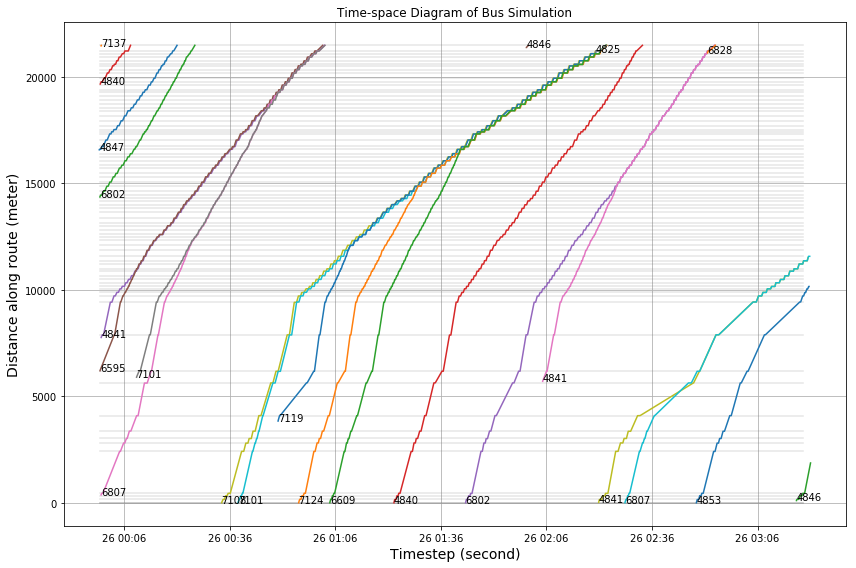

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10afe3a20>)

In [4]:
bsim.sim_tsd(active_bus, stops, archive_path, 1, 0, 200)

# Simulation with control
### Hold bus within 10 minute headway for 1 minute at each stop until relieved

In [6]:
# run simulation with control
bsim.simulate(archive_path, 1, live_bus, active_bus, stops, links, stop_pos, True, sim_time=200)

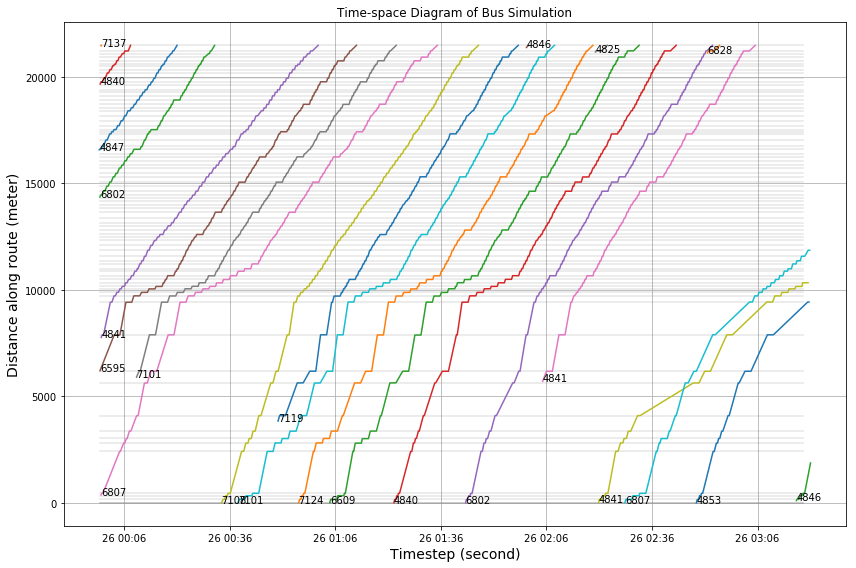

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ea0b438>)

In [7]:
bsim.sim_tsd(active_bus, stops, archive_path, 1, 0, 200)

In [ ]:
remove inactive?
print clock in plot_sim
missing trajectories in archive data?
q not calculating properly
hour of day: in night, beta constant, alpha smaller, q smaller, even though long headway, not much pax
eliminate convergence
stop-stop-link; link-stop-link --> bug: unable to correctly update and log dwell-time etc.
    
def eval_sim(bus_dict1, bus_dict2):
    
def eval_strategy(bus_dict):
    headway
    wait_time
    in-vehicle traveling time
    delay
    delay for different OD pairs
    bunching (how to eval?)
    spacing

# mean([mean(l.log_speed) for l in links.values() if len(l.log_speed) > 0])

In [ ]:
remove head and tail stops
create a larger Simulator class
evaluate different dwelling time settings
SimBus currently adopts real-time timestamp upon creation, will that cause any problem in the simulation process?